In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
# Leva slika
x1 = np.array([1960, 650, 1])
x2 = np.array([2305, 750, 1])
x3 = np.array([1680, 1000, 1])
x4 = np.array([1350, 895, 1])
# x5 - nevidljiva
x6 = np.array([2300, 1430, 1])
x7 = np.array([1740, 1755, 1])
x8 = np.array([1420, 1590, 1])
x9 = np.array([805, 1770, 1])
x10 = np.array([1890, 2075, 1])
x11 = np.array([1850, 2370, 1])
x12 = np.array([825, 2000, 1])
# x13 - nevidljiva
x14 = np.array([2560, 1210, 1])
x15 = np.array([2550, 1455, 1])
# x16 - nevidljiva

In [3]:
# Desna slika
y1 = np.array([2175, 430, 1])
y2 = np.array([2445, 620, 1])
y3 = np.array([1505, 815, 1])
y4 = np.array([1310, 590, 1])
# y5 - nevidljiva
y6 = np.array([2395, 1360, 1])
y7 = np.array([1575, 1600, 1])
y8 = np.array([1400, 1345, 1])
y9 = np.array([760, 1400, 1])
y10 = np.array([1470, 2010, 1])
y11 = np.array([1450, 2265, 1])
y12 = np.array([790, 1600, 1])
# y13 - nevidljiva
y14 = np.array([2870, 1180, 1])
y15 = np.array([2810, 1430, 1])
# y16 - nevidljiva

In [4]:
xx = np.array([x1, x2, x3, x4, x6, x7, x9, x10])
yy = np.array([y1, y2, y3, y4, y6, y7, y9, y10])

In [5]:
# Pravi jednu jednacinu oblika y^T * F * x = 0
def equation(x, y):
    a1 = x[0]
    a2 = x[1]
    a3 = x[2]
    b1 = y[0]
    b2 = y[1]
    b3 = y[2]
    
    return np.matrix([[a1*b1, a2*b1, a3*b1, a1*b2, a2*b2, a3*b2, a1*b3, a2*b3, a3*b3]])

In [6]:
# Pravi matricu formata 8x9 koja predstavlja 8 jedn dobijenih iz korespodencija
def MapThread(xx, yy):
    matrix = equation(xx[0], yy[0])
    n = len(xx)
    for i in range(1, n):
        pom = equation(xx[i], yy[i])
        matrix = np.concatenate((matrix, pom), axis=0)
        
    return matrix

In [7]:
jed8 = MapThread(xx, yy)

In [8]:
U, D, V = LA.svd(jed8)

print("Matrica U:\n", U)
print("\nMatrica D:\n", np.diag(D))
print("\nPrva kolona matrice V:\n", V[:, 0])

Matrica U:
 [[-0.29231413  0.41636091 -0.35413295  0.05474735  0.07946105 -0.65630915
   0.10389417  0.40612667]
 [-0.39742848  0.51766801 -0.32043237 -0.34757586 -0.03833608  0.36082579
   0.03165387 -0.46681654]
 [-0.2380977   0.08027173  0.19316582  0.08431081  0.64491894  0.44406657
   0.3343616   0.40930594]
 [-0.16434843  0.06875589  0.09201782  0.44160809  0.50323477 -0.16437029
  -0.58085313 -0.38356753]
 [-0.53221311  0.13777359  0.45558729  0.24134289 -0.52593118  0.15708916
  -0.2499865   0.26112758]
 [-0.38382844 -0.29501909  0.15202237  0.25845301 -0.0426281  -0.26279392
   0.63147497 -0.45397387]
 [-0.17224759 -0.37207462 -0.70356445  0.44188732 -0.13439191  0.31582507
  -0.06807462  0.13850302]
 [-0.46114838 -0.55048629 -0.02142707 -0.59477641  0.16299901 -0.14617526
  -0.2704218   0.09500042]]

Matrica D:
 [[1.39347903e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.96470001e+06 0.0000000

In [9]:
# Fundamentalna matrica
F = V[-1].reshape(3, 3)
print("Fundamentalna matrica F:\n", F)

Fundamentalna matrica F:
 [[ 1.12350085e-07  5.65271945e-07 -8.73236617e-04]
 [-5.48712851e-07  3.00616612e-07  7.75594388e-04]
 [ 3.24045701e-04 -1.49078839e-03  9.99998154e-01]]


In [10]:
print("Determinanta fundamentalne matrice:\n", LA.det(F))

Determinanta fundamentalne matrice:
 -1.3336584175406677e-14


In [11]:
# Funkcija za proveru da li je y^T * F * x = 0
def test(x, y):
    pom = np.dot(np.dot(y, F), x)
    return pom[0, 0]

In [12]:
list = []
for i in range(len(xx)):
    element = test(xx[i], yy[i])
    list.append(element)
print("Testiranje da li vazi uslov:\n", list)

Testiranje da li vazi uslov:
 [0.0, -7.105427357601002e-15, -1.3378187446733136e-14, -3.325117958752344e-14, -6.228351168147128e-14, 1.5765166949677223e-14, 2.4868995751603507e-14, 1.1013412404281553e-13]


In [13]:
SVDF = LA.svd(F)
U, DD, V = SVDF
print("Matrica U:\n", U)
print("\nMatrica DD:\n", np.diag(DD))
print("\nTransponovana matrica V:\n", V)

Matrica U:
 [[ 8.73236407e-04  4.49301455e-01 -8.93379785e-01]
 [-7.75592860e-04 -8.93379553e-01 -4.49302096e-01]
 [-9.99999318e-01  1.08524593e-03 -4.31656551e-04]]

Matrica DD:
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.86043865e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.16851598e-09]]

Transponovana matrica V:
 [[-3.24044956e-04  1.49078763e-03 -9.99998836e-01]
 [ 4.79648806e-01 -8.77459333e-01 -1.46353500e-03]
 [ 8.77460494e-01  4.79648722e-01  4.30718235e-04]]


In [14]:
V = np.transpose(V)

In [15]:
# Da bi se nasao epipol e1 treba resiti sistem F * e1 = 0
# To se resava preko SVD dekompozije
# Treca kolona transponovane matrice V je bas taj trazeni epipol
# Ona odgovara najmanjoj sopstvenoj vrednosti matrice
e1 = np.transpose(V[:, 2])
print("Epipol e1:\n", e1)

Epipol e1:
 [[8.77460494e-01 4.79648722e-01 4.30718235e-04]]


In [16]:
e1 = e1 / e1[0, 2]
print("Afine koordinate epipola e1:\n", e1)

Afine koordinate epipola e1:
 [[2.03720303e+03 1.11360208e+03 1.00000000e+00]]


In [17]:
# Za epipol e2, treba da se resi F^T * e2 = 0, ali 
# F^T = (UDV^T)^T = VDU^T
# Posto je (U, D, V) SVD dekompozicija od F
# onda je (V, D, U) SVD dekompozicija of F^T, pa je e2 treca
# kolona matrica U
e2 = np.transpose(U[:, 2])
print("Epipol e2:\n", e2)

Epipol e2:
 [[-8.93379785e-01 -4.49302096e-01 -4.31656551e-04]]


In [18]:
e2 = e2 / e2[0, 2]
print("Afine koordinate e2:\n", e2)

Afine koordinate e2:
 [[2.06965418e+03 1.04087867e+03 1.00000000e+00]]


In [19]:
# Postizanje uslova det(F) = 0
DD1 = np.diag([1, 1, 0]) * DD
print("DD1: \n", DD1)

DD1: 
 [[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.86043865e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [20]:
FF1 = np.dot(np.dot(U, DD1), np.transpose(V))
print("F:\n", F)
print("\nFF1:\n", FF1)

F:
 [[ 1.12350085e-07  5.65271945e-07 -8.73236617e-04]
 [-5.48712851e-07  3.00616612e-07  7.75594388e-04]
 [ 3.24045701e-04 -1.49078839e-03  9.99998154e-01]]

FF1:
 [[ 1.17969524e-07  5.68343715e-07 -8.73236614e-04]
 [-5.45886700e-07  3.02161479e-07  7.75594390e-04]
 [ 3.24045704e-04 -1.49078838e-03  9.99998154e-01]]


In [21]:
print("det(F):\n", LA.det(F))
print("\ndet(FF1):\n", LA.det(FF1))

det(F):
 -1.3336584175406677e-14

det(FF1):
 0.0


In [22]:
# F i FF1 imaju iste matrice U i V u SVD dekompoziciji
# pa samim tim imaju i iste epipolove
# Nadalje se koristi FF1

In [23]:
# x13 = np.cross(np.cross(np.cross(np.cross(x12, x16), np.cross(x14, x10)), x9), np.cross(np.cross(np.cross(x12, x9), np.cross(x10, x11)), x16))
# x13 = x13 / x13[2]
# x13.round()
x5 = np.cross(np.cross(np.cross(np.cross(x4, x8), np.cross(x6, x2)), x1), 
             np.cross(np.cross(np.cross(x1, x4), np.cross(x3, x2)), x8))
x5 = np.round(x5 / x5[2])


x13 = np.cross(np.cross(np.cross(np.cross(x9, x10), np.cross(x11, x12)), x14), 
             np.cross(np.cross(np.cross(x11, x15), np.cross(x10, x14)), x9))
x13 = np.round(x13 / x13[2])

x16 = np.cross(np.cross(np.cross(np.cross(x10, x14), np.cross(x11, x15)), x12), 
             np.cross(np.cross(np.cross(x9, x10), np.cross(x11, x12)), x15))
x16 = np.round(x16 / x16[2])

y5 = np.cross(np.cross(np.cross(np.cross(y4, y8), np.cross(y6, y2)), y1), 
             np.cross(np.cross(np.cross(y1, y4), np.cross(y3, y2)), y8))
y5 = np.round(y5 / y5[2])

y16 = np.cross(np.cross(np.cross(np.cross(y10, y14), np.cross(y11, y15)), y12), 
             np.cross(np.cross(np.cross(y9, y10), np.cross(y11, y12)), y15))
y16 = np.round(y16 / y16[2])

y13 = np.cross(np.cross(np.cross(np.cross(y9, y10), np.cross(y11, y12)), y14), 
             np.cross(np.cross(np.cross(y11, y15), np.cross(y10, y14)), y9))
y13 = np.round(y13 / y13[2])

In [24]:
# Pravi se kanonska matrica kamere
eye = np.eye(3)
column = np.matrix([0, 0, 0])
T1 = np.concatenate((eye, np.transpose(column)), axis = 1)
print("Matrica T1:\n", T1)

Matrica T1:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [25]:
# Matrica vektorskog mnozenja
def vec(x):
    p1 = x[0, 0]
    p2 = x[0, 1]
    p3 = x[0, 2]
    matrix = np.matrix([[0, -p3, p2], [p3, 0, -p1], [-p2, p1, 0]])
    return matrix

In [26]:
E2 = vec(e2)
print("E2:\n", E2)

E2:
 [[ 0.00000000e+00 -1.00000000e+00  1.04087867e+03]
 [ 1.00000000e+00  0.00000000e+00 -2.06965418e+03]
 [-1.04087867e+03  2.06965418e+03  0.00000000e+00]]


In [27]:
# Matrica kamere T2
firstPart = E2 * FF1
print("E2 * FF1:\n", firstPart)
print("\ne2:\n", e2)
T2 = np.concatenate((firstPart, np.transpose(e2)), axis=1)
print("\nMatrica T2:\n", T2)

E2 * FF1:
 [[ 3.37292806e-01 -1.55173013e+00  1.04087597e+03]
 [-6.70662427e-01  3.08541698e+00 -2.06965123e+03]
 [-1.25258865e-03  3.37929188e-05  2.51414554e+00]]

e2:
 [[2.06965418e+03 1.04087867e+03 1.00000000e+00]]

Matrica T2:
 [[ 3.37292806e-01 -1.55173013e+00  1.04087597e+03  2.06965418e+03]
 [-6.70662427e-01  3.08541698e+00 -2.06965123e+03  1.04087867e+03]
 [-1.25258865e-03  3.37929188e-05  2.51414554e+00  1.00000000e+00]]


In [28]:
# Za svaku tacku dobijemo sistem od cetiri jednacine sa 4 homogene
# nepoznate. Uzimaju se 3 jednacine
def jednacine(x, y, T1, T2):
    niz = np.array([x[1] * T1[2] - x[2] * T1[1], -x[0] * T1[2] + x[2] * T1[0], y[1] * T2[2] - y[2] * T2[1], -y[0] * T2[2] + y[2] * T2[0]])
    return np.matrix(niz)

In [29]:
print("Matrica koja se dobija iz jednacina:\n", jednacine(x1, y1, T1, T2))

Matrica koja se dobija iz jednacina:
 [[ 0.00000000e+00 -1.00000000e+00  6.50000000e+02  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -1.96000000e+03  0.00000000e+00]
 [ 1.32049306e-01 -3.07088603e+00  3.15073382e+03 -6.10878669e+02]
 [ 3.06167313e+00 -1.62522973e+00 -4.42739057e+03 -1.05345818e+02]]


In [30]:
s, v, d = LA.svd(jednacine(x1, y1, T1, T2))
print("SVD dekompozicija jednacina:")
print(s)
print("\n", np.diag(v))
print("\n", d)

SVD dekompozicija jednacina:
[[ 0.11160412 -0.04994268  0.92999582 -0.34663818]
 [-0.33652937  0.15063391 -0.28170295 -0.88583343]
 [ 0.54554636  0.83547609 -0.04013944 -0.05241837]
 [-0.75938901  0.52611296  0.23268015  0.30396287]]

 [[5.81863841e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.66348154e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.25896475e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.02470209e-02]]

 [[-4.45033888e-04 -9.49935692e-05  9.99052175e-01 -4.35263652e-02]
 [ 3.30493506e-03 -5.95175173e-03 -4.35244565e-02 -9.99029167e-01]
 [ 3.37886540e-01 -9.41162869e-01  3.53337050e-04  6.70939571e-03]
 [ 9.41180942e-01  3.37900906e-01  4.98384234e-04  1.07879501e-03]]


In [31]:
print("Poslednja vrsta poslednje matrice SVD dekompozicije:\n"
      , LA.svd(jednacine(x1, y1, T1, T2))[2][3])

Poslednja vrsta poslednje matrice SVD dekompozicije:
 [[9.41180942e-01 3.37900906e-01 4.98384234e-04 1.07879501e-03]]


In [32]:
def uAfine(x):
    print(x)
    x = x / x[2]
    return x[:-1]

In [33]:
# Fja vraca 3D koordinate rekonstruisane tacke, preko prethodnog principa
def triD(x, y, T1, T2):
    mat = np.transpose(LA.svd(jednacine(x, y, T1, T2))[2][3])
    niz = np.array(mat)
    return uAfine(niz)

In [34]:
print("3D koordinate za x2, y2:\n", triD(x2, y2, T1, T2))

[[9.50742885e-01]
 [3.09977588e-01]
 [4.35579778e-04]
 [1.29323058e-03]]
3D koordinate za x2, y2:
 [[2.18270666e+03]
 [7.11643662e+02]
 [1.00000000e+00]]


In [35]:
slika1 = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16])
slika2 = np.array([y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16])

In [36]:
# Rekonstrukcija 3D koordinata tacaka
def MapThread2(xx, yy):
    rekonstruisane = []
    for i in range(len(xx)):
        tmp = triD(xx[i], yy[i], T1, T2)
        rekonstruisane.append(tmp)
        print(f"\n{i}. rekonstrukcija:\n{tmp}")
    return rekonstruisane

In [37]:
rekonstruisane = MapThread2(slika1, slika2)

[[9.41180942e-01]
 [3.37900906e-01]
 [4.98384234e-04]
 [1.07879501e-03]]

0. rekonstrukcija:
[[1.88846452e+03]
 [6.77992768e+02]
 [1.00000000e+00]]
[[9.50742885e-01]
 [3.09977588e-01]
 [4.35579778e-04]
 [1.29323058e-03]]

1. rekonstrukcija:
[[2.18270666e+03]
 [7.11643662e+02]
 [1.00000000e+00]]
[[8.45709532e-01]
 [5.33642871e-01]
 [5.05368738e-04]
 [6.46168966e-04]]

2. rekonstrukcija:
[[1.67345043e+03]
 [1.05594753e+03]
 [1.00000000e+00]]
[[8.24986637e-01]
 [5.65151242e-01]
 [6.14074279e-04]
 [8.62998216e-04]]

3. rekonstrukcija:
[[1.34346392e+03]
 [9.20330425e+02]
 [1.00000000e+00]]
[[-7.36333335e-01]
 [ 6.76617574e-01]
 [ 1.37052606e-03]
 [ 2.16297987e-05]]

4. rekonstrukcija:
[[-537.26328534]
 [ 493.69186954]
 [   1.        ]]
[[-8.78808652e-01]
 [-4.77173157e-01]
 [-3.69536953e-04]
 [-9.97290788e-04]]

5. rekonstrukcija:
[[2.37813471e+03]
 [1.29127318e+03]
 [1.00000000e+00]]
[[7.14668333e-01]
 [6.99462295e-01]
 [3.92705826e-04]
 [1.23150732e-03]]

6. rekonstrukcija:
[[1.81985671e+

In [38]:
# Mnozi se z koordinata jer nije radjena normalizacija
dig = np.eye(3)
dig[2][2] = 400
rekonstruisane400 = np.zeros((24, 3))
print("Rekonstruisane400:")
for i in range(len(rekonstruisane)):
    rekonstruisane400[i] = dig.dot(rekonstruisane[i][:,0])
    print(rekonstruisane400[i])

Rekonstruisane400:
[1888.46451798  677.99276763  400.        ]
[2182.70666487  711.64366174  400.        ]
[1673.45043118 1055.94753154  400.        ]
[1343.46391837  920.33042475  400.        ]
[-537.26328534  493.69186954  400.        ]
[2378.1347055 1291.2731832  400.       ]
[1819.85671233 1781.13551965  400.        ]
[1440.73145274 1614.40728585  400.        ]
[ 813.64462422 1785.70890996  400.        ]
[1952.15603661 2081.00474342  400.        ]
[2045.18316071 2375.76532638  400.        ]
[ 869.7060643  2055.86012978  400.        ]
[1461.72826795  987.05988389  400.        ]
[2560.04426976 1104.14944927  400.        ]
[2609.6273629 1263.217445   400.       ]
[-2267.29250117   331.05500264   400.        ]


In [39]:
iviceMala = np.array([[1, 2], [2, 3], [3, 4], [4, 1],
                      [5, 6], [6, 7], [7, 8], [8, 5],
                      [1, 5], [2, 6], [3, 7], [4, 8]])

iviceVelika = np.array([[9, 10], [10, 11], [11, 12], [12,  9], 
                        [13, 14], [14, 15], [15, 16], [16, 13],
                        [9, 13], [10, 14], [11, 15], [12, 16]])

<IPython.core.display.Javascript object>


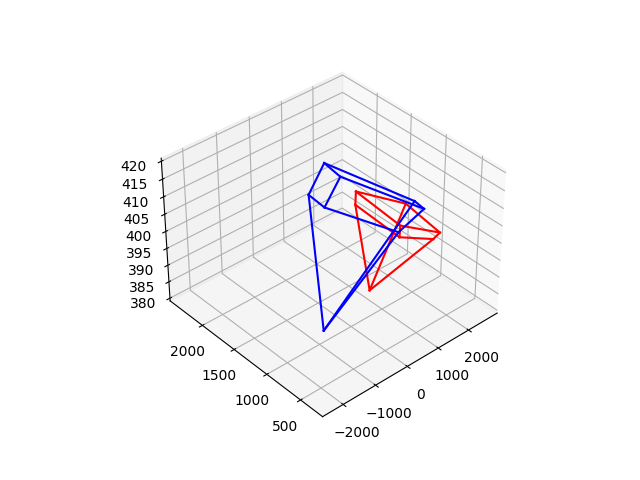

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in iviceMala:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'red')

for ivica in iviceVelika:
    ax.plot3D([rekonstruisane400[ivica[0] - 1][0], rekonstruisane400[ivica[1] - 1][0]], [rekonstruisane400[ivica[0] - 1][1], rekonstruisane400[ivica[1] - 1][1]], [rekonstruisane400[ivica[0] - 1][2], rekonstruisane400[ivica[1] - 1][2]], 'blue')